In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(R'weatherAUS.csv')


# Exploring data

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Evaporatio, sunshine, cloud9am and cloud3pm has high no. of null values

# Data Visualization

In [9]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

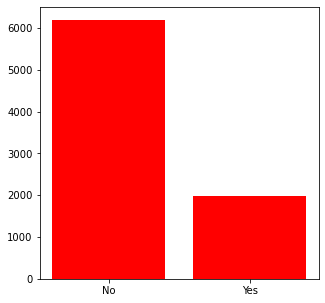

In [10]:
plt.figure(figsize=(5,5))
plt.bar(['No','Yes'],list(df['RainTomorrow'].value_counts()),color = 'r')
plt.show()


Target column values are highly imbalanced.So we will resample the data for better accuracy

<ipython-input-11-6477e930c4f7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],ax=axes[i//5,i%5], kde = False, bins = 20);


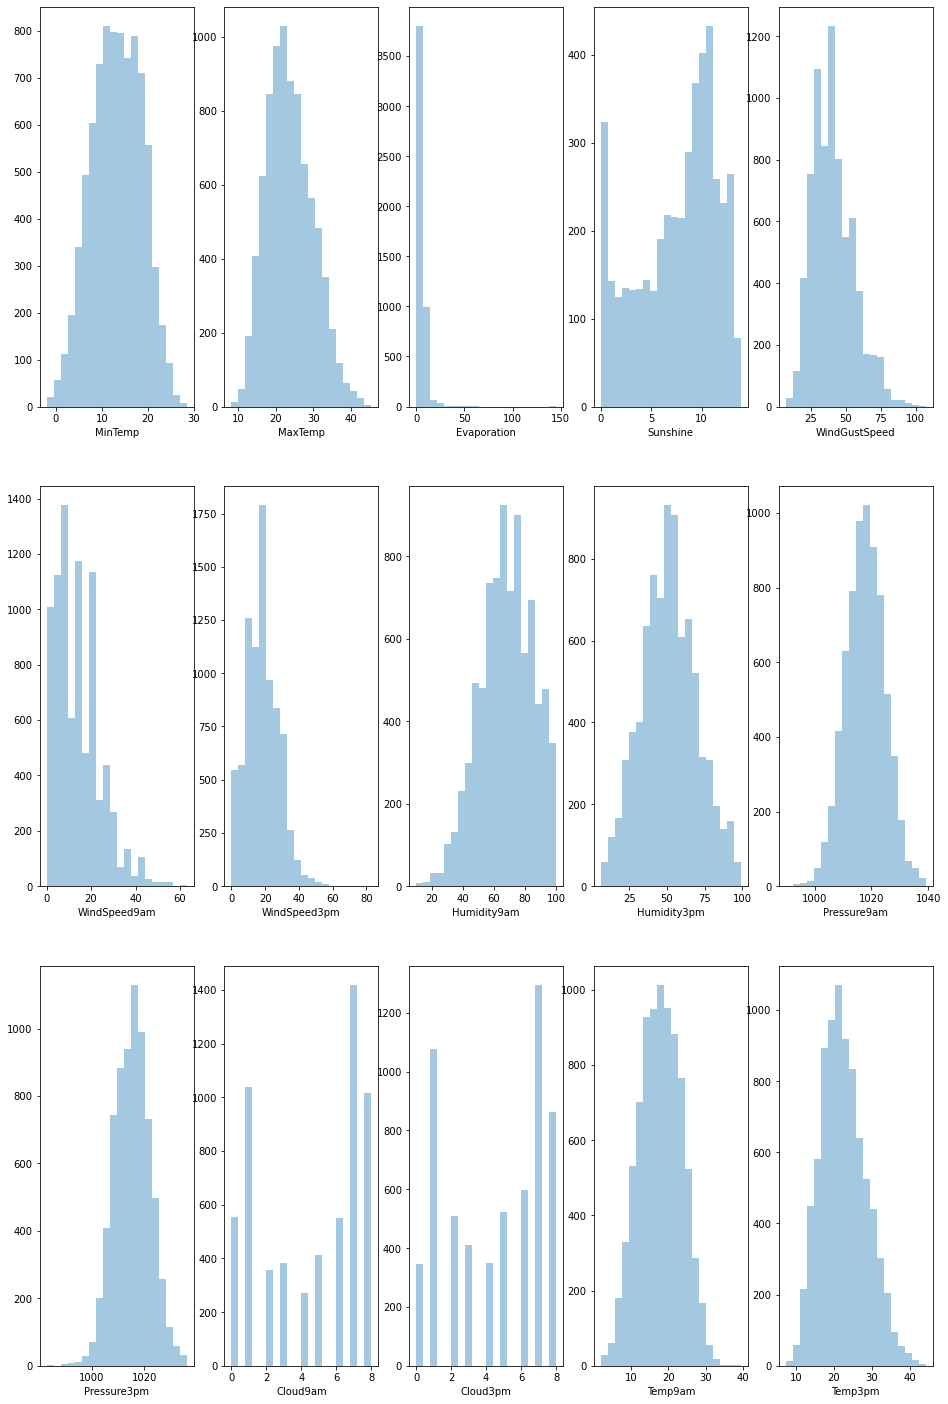

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=5);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//5,i%5], kde = False, bins = 20);

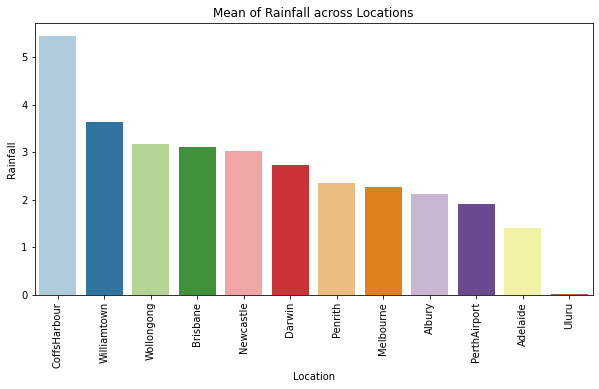

In [12]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean of Rainfall across Locations");

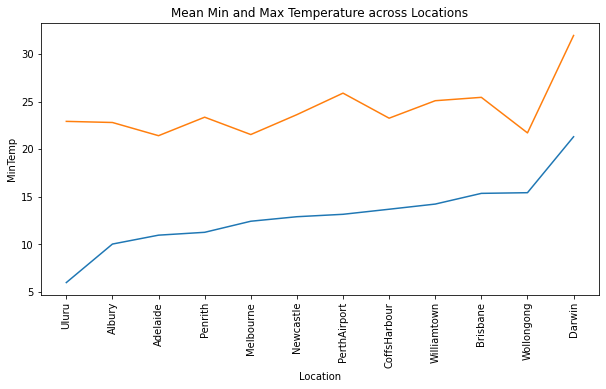

In [13]:
MinTemp_loc = df.groupby('Location')["MinTemp"].mean().sort_values()
MaxTemp_loc = df.groupby('Location')["MaxTemp"].mean().sort_values()

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.lineplot(x = MinTemp_loc.index, y = MinTemp_loc);
sns.lineplot(x = MaxTemp_loc.index, y = MaxTemp_loc).\
            set_title("Mean Min and Max Temperature across Locations");

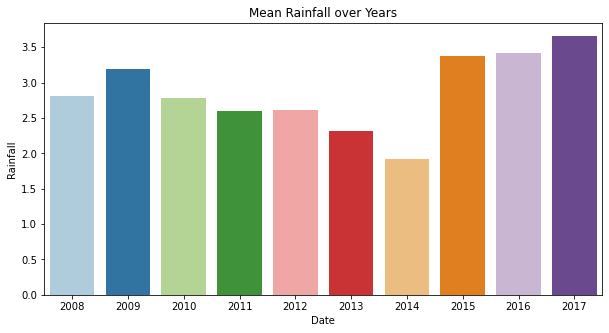

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

<ipython-input-15-fca083acb5ff>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,


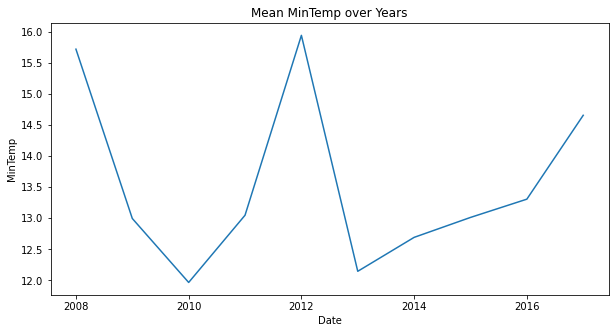

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years");

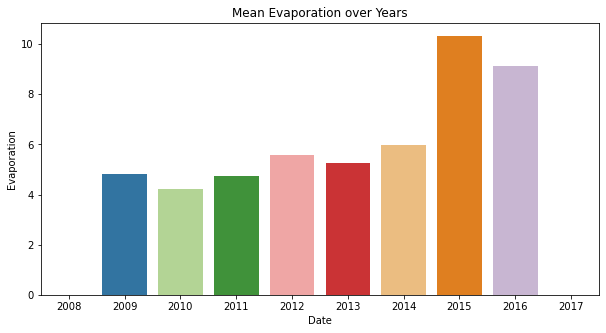

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Evaporation over Years");

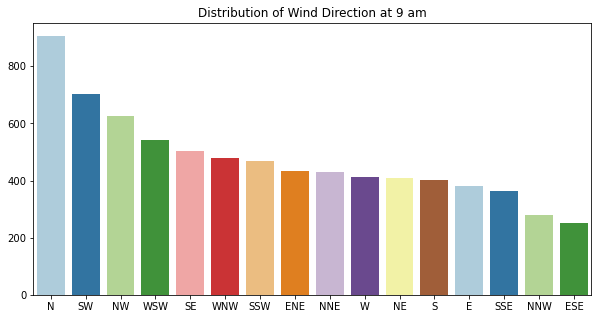

In [17]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir9am'].value_counts().index,
            y = df['WindDir9am'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 9 am");

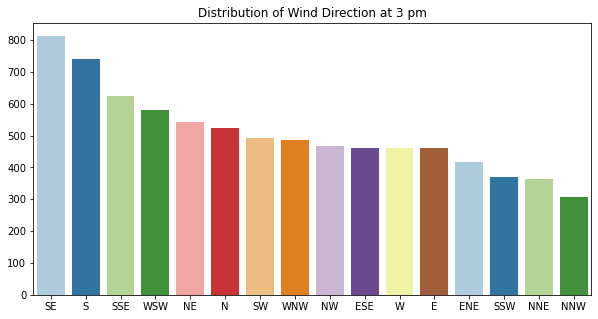

In [18]:
fig = plt.gcf()
fig.set_size_inches((10, 5));

sns.barplot(x = df['WindDir3pm'].value_counts().index,
            y = df['WindDir3pm'].value_counts().values,
            palette = sns.color_palette("Paired")).\
            set_title("Distribution of Wind Direction at 3 pm");

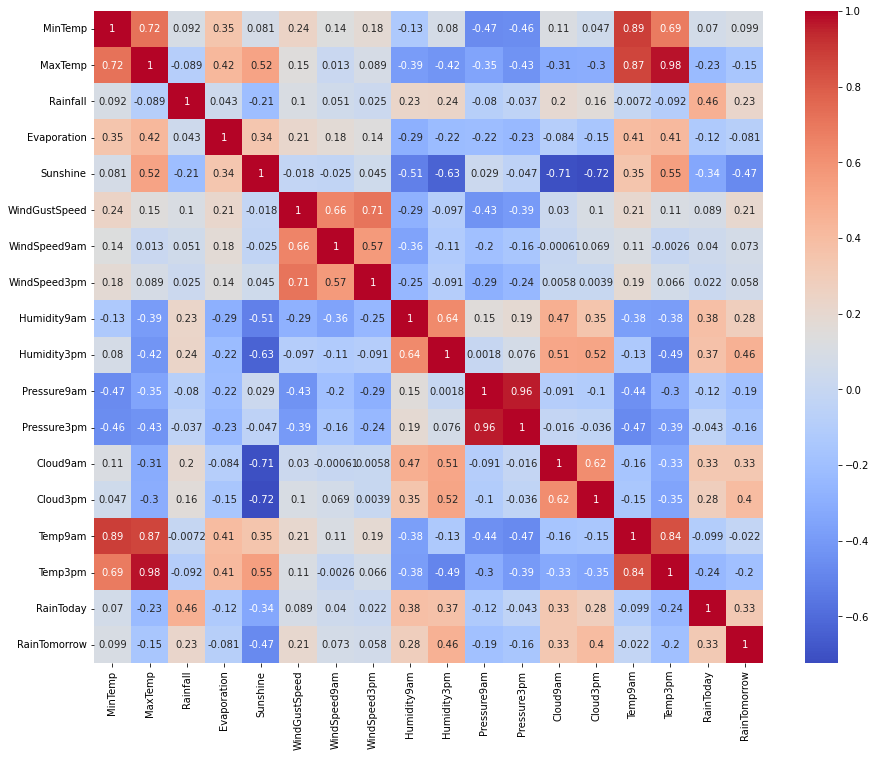

In [19]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

# Data cleaning and data processing

Handling Class Imbalance

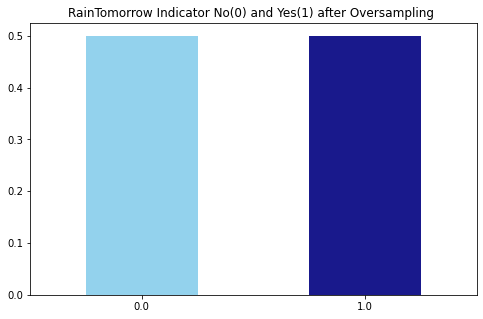

In [20]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

Feature Selection

# For predicting RainTomorrow

In [21]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [22]:
Y=Y.reshape(-1,1)

Dealing with Missing Values

In [23]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

Encoding categorical data

In [24]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])

le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])

le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])

le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

Scaling features

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Modelling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [27]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_test, y_test)

<ipython-input-27-60c3ee5808cf>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)
<ipython-input-27-60c3ee5808cf>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_test, y_test)


0.7483492296404989

In [28]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8774761555392516

In [29]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9144044998777208

In [30]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


gbr.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8107116654438739

In [31]:
#Ridge
from sklearn.linear_model import Ridge
ridgeMod = Ridge(alpha=0.01, normalize=True)
ridgeMod.fit(X_train, y_train)
ridgeMod.fit(X_test, y_test)
ridge_model_pred = ridgeMod.predict(X_test)
ridgeMod.score(X_test, y_test)

0.36074100853090874

In [32]:
#LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.fit(X_test, y_test)
logreg_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.76840303252629

In [33]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc.fit(X_test, y_test)
svc_pred = svc.predict(X_test)
svc.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8368794326241135

In [34]:
#GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.fit(X_test, y_test)
gaussian_pred = gaussian.predict(X_test)
gaussian.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7366104181951577

In [35]:
accuracy_dict = {"RandomForestClassifier": regr.score(X_test, y_test),
                 "KNeighborsClassifier": knn.score(X_test, y_test),
                 "DecisionTreeClassifier": dtr.score(X_test, y_test),
                 "GradientBoostingClassifier": gbr.score(X_test, y_test),
                 "Ridge": ridgeMod.score(X_test, y_test),
                "LogisticRegression": logreg.score(X_test, y_test),
                "Support Vector Classifier": svc.score(X_test, y_test),
                "GaussianNB":gaussian.score(X_test, y_test) }

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
RandomForestClassifier,0.748349
KNeighborsClassifier,0.877476
DecisionTreeClassifier,0.914404
GradientBoostingClassifier,0.810712
Ridge,0.360741
LogisticRegression,0.768403
Support Vector Classifier,0.836879
GaussianNB,0.736610


DecisionTreeClassifier is giving us the best score hence selecting and saving it.

In [36]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(dtr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)

In [37]:
conclusion =pd.DataFrame([loaded_model.predict(X_test)[:],y_test_pred[:]],index = ["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088
Predicted,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Original,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# For predicting Rainfall

In [38]:
X = df.iloc[:,[1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
Y = df.iloc[:,4].values

In [57]:
X

array([[1, 13.4, 22.9, ..., 133, 0.0, 0],
       [1, 7.4, 25.1, ..., 158, 0.0, 0],
       [1, 12.9, 25.7, ..., 147, 0.0, 0],
       ...,
       [5, 8.8, 18.1, ..., 96, 0.0, 1],
       [5, 19.6, 23.5, ..., 114, 1.0, 1],
       [0, 7.2, 13.3, ..., 41, 1.0, 1]], dtype=object)

In [39]:
Y=Y.reshape(-1,1)

Dealing with Missing Values

In [40]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

Encoding categorical data

In [44]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,3] = le2.fit_transform(X[:,3])

le3 = LabelEncoder()
X[:,4] = le3.fit_transform(X[:,4])

le4 = LabelEncoder()
X[:,5] = le4.fit_transform(X[:,5])

le5 = LabelEncoder()
X[:,15] = le5.fit_transform(X[:,15])

le6 = LabelEncoder()
X[:,16] = le6.fit_transform(X[:,16])

# Modelling

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [56]:
df['Rainfall'].value_counts()

0.0      6795
0.2       621
0.4       280
0.6       197
1.4       152
         ... 
37.6        1
34.4        1
128.0       1
240.0       1
29.4        1
Name: Rainfall, Length: 250, dtype: int64

In [46]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_test, y_test)

<ipython-input-46-19ad04ca4c24>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)
<ipython-input-46-19ad04ca4c24>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_test, y_test)


0.5152549358759106

In [47]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.6923193243257377

In [49]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7574294308867691

In [50]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


gbr.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.665011415693559

In [51]:
#Ridge
from sklearn.linear_model import Ridge
ridgeMod = Ridge(alpha=0.01, normalize=True)
ridgeMod.fit(X_train, y_train)
ridgeMod.fit(X_test, y_test)
ridge_model_pred = ridgeMod.predict(X_test)
ridgeMod.score(X_test, y_test)

0.4933989552556993

In [52]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.fit(X_test, y_test)
logreg_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

0.5710442651014918

In [53]:
#Support Vector RandomForestRegressor
from sklearn.svm import SVR
svc = SVR()
svc.fit(X_train, y_train)
svc.fit(X_test, y_test)
svc_pred = svc.predict(X_test)
svc.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.19636693968093932

In [54]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB 
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.fit(X_test, y_test)
gaussian_pred = gaussian.predict(X_test)
gaussian.score(X_test, y_test)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5671313279530448

In [55]:
accuracy_dict = {"RandomForestRegressor": regr.score(X_test, y_test),
                 "KNeighborsRegressor": knn.score(X_test, y_test),
                 "DecisionTreeRegressor": dtr.score(X_test, y_test),
                 "GradientBoostingRegressor": gbr.score(X_test, y_test),
                 "Ridge": ridgeMod.score(X_test, y_test),
                "LogisticRegression": logreg.score(X_test, y_test),
                "Support Vector Regressor": svc.score(X_test, y_test),
                "GaussianNB":gaussian.score(X_test, y_test) }

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
RandomForestRegressor,0.515255
KNeighborsRegressor,0.692319
DecisionTreeRegressor,0.757429
GradientBoostingRegressor,0.665011
Ridge,0.493399
LogisticRegression,0.571044
Support Vector Regressor,-0.196367
GaussianNB,0.567131


In [58]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(dtr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)